# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 

<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.


**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')

**b.** Use the cell below to find the number of rows in the dataset.

In [3]:
df.user_id.count()

294478

**c.** The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

**d.** The proportion of users converted.

In [5]:
df.converted.mean()

0.11965919355605512

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [6]:
df.query("group == 'treatment' and landing_page != 'new_page'").count()

user_id         1965
timestamp       1965
group           1965
landing_page    1965
converted       1965
dtype: int64

**f.** Do any of the rows have missing values?

In [7]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df.query("group == 'treatment' and landing_page != 'new_page'").count()

user_id         1965
timestamp       1965
group           1965
landing_page    1965
converted       1965
dtype: int64

In [9]:
df.query("group == 'control' and landing_page != 'old_page'").count()

user_id         1928
timestamp       1928
group           1928
landing_page    1928
converted       1928
dtype: int64

In [10]:
drop1 = df.query("group == 'treatment' and landing_page != 'new_page'").index
drop2 = df.query("group == 'control' and landing_page != 'old_page'").index 

In [11]:
df2 = df
df2.drop(drop1, inplace = True)
df2.drop(drop2, inplace = True)

In [12]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [13]:
df2.user_id.nunique()

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [14]:
df2[df2.duplicated(subset = ['user_id'])]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**c.** Display the rows for the duplicate **user_id**? 

In [15]:
df2[df2.duplicated(subset = ['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [16]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 
df2.drop([2893], axis = 0, inplace = True)
# Check again if the row with a duplicate user_id is deleted or not
df2[df2.duplicated(subset = ['user_id'])]

,user_id,timestamp,group,landing_page,converted


### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>

In [17]:
p_populuation = df2.query('converted == 1').count()[0]/df2.shape[0]
p_populuation 

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
ctrl_conv_rate = df2.query('converted == 1 and group == "control"').count()[0] / df2.query('group == "control"').count()[0]
ctrl_conv_rate

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
treat_conv_rate = df2.query('converted == 1 and group == "treatment"').count()[0]/ df2.query('group == "treatment"').count()[0]
treat_conv_rate

0.11880806551510564

In [20]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = treat_conv_rate - ctrl_conv_rate
obs_diff

-0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [21]:
new_page_prob = df2.query('landing_page == "new_page"').count()[0]/df2.shape[0]
new_page_prob

0.50006194422266881

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

>The difference between the conversion rates of the control and treatment groups is slightly in favor of the control group using the existing webpage; however, the value of -0.15% is so small that further exploration needs to be done to show if it is statistically significant and not simply due to chance.

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

>**$H_0$** =  **$p_{old}$**  >=  **$p_{new}$**

>**$H_1$**  =  **$p_{old}$**  <  **$p_{new}$**

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [22]:
p_new = df2.query('converted == 1').count()[0]/df2.shape[0]
p_new

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [23]:
p_old = df2.query('converted == 1').count()[0]/df2.shape[0]
p_old

0.11959708724499628

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>

In [24]:
n_new = df2.query('landing_page == "new_page"').count()[0]
n_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [25]:
n_old = df2.query('landing_page != "new_page"').count()[0]
n_old

145274

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>

In [26]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.binomial(1, p_new, n_new)

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [27]:
# Simulate a Sample for the control Group
old_page_converted = np.random.binomial(1, p_old, n_old)

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [28]:
new_page_converted.mean() - old_page_converted.mean()

-0.00031878744358961042


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [29]:
# Sampling distribution 
p_diffs = []
new_page_converted = np.random.binomial(n_new, p_new, 10000)
old_page_converted = np.random.binomial(n_old, p_old, 10000)
p_diffs = new_page_converted/n_new - old_page_converted/n_old
p_diffs = np.array(p_diffs)

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  

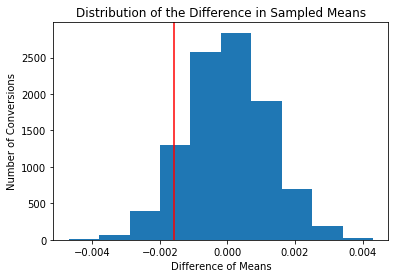

In [30]:
plt.hist(p_diffs)
plt.title("Distribution of the Difference in Sampled Means")
plt.xlabel("Difference of Means")
plt.ylabel("Number of Conversions")
plt.axvline(x=obs_diff, c = 'red');

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [31]:
(p_diffs > obs_diff).mean()

0.90880000000000005

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

>In scientific studies, the proportion of the sample mean difference compared to the observed difference is called the p-value. This value helps us to determine if the observed mean difference is a valid representation of the population or if it was a stastically unlikely value.

>In this particular case, the p value of 0.905 is much larger than the Type 1 error rate of 0.05. This means that we fail to reject the null hypothesis and should continue using the original website layout.



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [32]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = df2.query("converted == 1 and landing_page == 'old_page'").count()[0]


# number of conversions with the new_page
convert_new =df2.query("converted == 1 and landing_page == 'new_page'").count()[0]


# number of individuals who were shown the old_page
n_old = df2.query("landing_page == 'old_page'").count()[0]

# number of individuals who received new_page
n_new = df2.query("landing_page == 'new_page'").count()[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. 
>Hint:<br>
For a right-tailed test, reject null if $Z_{score}$ > $Z_{\alpha}$. <br>
For a left-tailed test, reject null if $Z_{score}$ < $Z_{\alpha}$. 


In other words, we determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. A "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.



Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org

In [33]:
## Right-tailed test
import statsmodels.api as sm
import numpy as np
count_array = np.array([convert_old, convert_new])
nobs_array = np.array([n_old, n_new])
z_score, p_value = sm.stats.proportions_ztest(count_array[::-1], 
                                              nobs_array[::-1], 
                                              alternative = 'larger')
print(z_score, p_value)

-1.31092419842 0.905058312759


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

> The z-score represents the distance away from the mean value for our sampling distribution. The p-value represents the likelihood that this difference is due to the new page or the original page. The p-value from the z-test is nearly identical to the p-value from part j and k.  0.905 is still signficantly larger than the acceptable error rate, meaning we continue to fail to reject the null hypothesis, supporting the original design.

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

>Logistic Regression Model

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [34]:
df2[['control', 'treatment']] = pd.get_dummies(df2['group'])
df2['intercept'] = 1
df2.drop(['control'], axis=1, inplace = True)
df2.rename(columns = {'treatment' : 'ab_page'}, inplace = True)
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [35]:
model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
model_fit = model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [36]:
model_fit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-12-21 08:33 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

>The p-value for the ab_page is 0.1899. The biggest difference in the p-values between Part II and Part III is that Part II was using a one-tail test, while Part III is using a two-sided test due to binary nature of the data involved.

>Although the p-values are different in the two modeling approaches, the p-value for the regression test is still greater than the Type I error rate, which means that we continue to fail to reject the null hypothesis. This has been consistent across the three parts.

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>It is a good idea to consider other factors while creating a regression model. Humans are very complex and can vary tremendously from person to person in preferences. Because we are interested in knowing if a new web page design appeals to more people, adding additional factors will help us to pinpoint the group of the population that would be more open to the offerings. 

>One major disadvantage to adding additional terms into the regression model is you can significantly and incorrectly change the coefficients for a particular item if there are factors that are correlated to each other. 

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 

 Provide the statistical output as well as a written response to answer this question.

In [37]:
# Read the countries.csv
df_countries = pd.read_csv('countries.csv')

In [38]:
# Join with the df2 dataframe
df_merged = df2.join(df_countries, lsuffix = 'user_id', rsuffix = 'user_id')

In [39]:
# Create the necessary dummy variables
df_merged[['CA', 'UK', 'US']] = pd.get_dummies(df_merged['country'])
df_merged.head()

,user_iduser_id,timestamp,group,landing_page,converted,ab_page,intercept,user_iduser_id,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,834778.0,UK,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,928468.0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,822059.0,UK,0,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,711597.0,UK,0,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,710616.0,UK,0,1,0


In [40]:
# Fit your model, and summarize the results
model2 = sm.Logit(df_merged['converted'], df_merged[['intercept', 'ab_page', 'US', 'UK']])
model2_fit = model2.fit()
model2_fit.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-12-21 08:33 AIC:              212783.0251
No. Observations:   290584           BIC:              212825.3437
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0123    0.0238  -84.6457  0.0000  -2.0589  -1.9657
ab_page       -0.0150    0.0114   -1.3081  0.1908  -0.0374   0.0075
US             0.0234    0.0241    0.9708  0.3316  -0.0238   0.0706
UK             0.0296    0.0258    1.1483  0.2509  -0.0209   0.0801
==================================================================

"""

>The p-values for the US and the UK (0.3312 and 0.2496) are far greater than the Type I error rate of 0.05. This indicates that country has little impact on the page conversion rate. There is no stastical evidence from our regression model that would allow us to reject the null hypothesis; therefore, we fail to reject the null hypothesis.  Practically, this means that there is no evidence that the new page design brings more conversions than the original page and that a person's country does not affect his or her decision to sign up.

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 

In [41]:
# Add interactive terms of country with the test page
df_merged['US_inter'] = df_merged['US']*df_merged['ab_page']
df_merged['UK_inter'] = df_merged['UK']*df_merged['ab_page']
df_merged.head()

,user_iduser_id,timestamp,group,landing_page,converted,ab_page,intercept,user_iduser_id,country,CA,UK,US,US_inter,UK_inter
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,834778.0,UK,0,1,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,928468.0,US,0,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,822059.0,UK,0,1,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,711597.0,UK,0,1,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,710616.0,UK,0,1,0,0,0


In [42]:
# Fit your model, and summarize the results
model3 = sm.Logit(df_merged['converted'], df_merged[['intercept', 'ab_page', 'US_inter', 'UK_inter']])
model3_fit = model3.fit()
model3_fit.summary2()

Optimization terminated successfully.
         Current function value: 0.366117
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-12-21 08:33 AIC:              212783.7655
No. Observations:   290584           BIC:              212826.0841
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0020    0.0332    -0.0600  0.9521  -0.0671   0.0631
US_inter     -0.0171    0.0336    -0.5073  0.6119  -0.0830   0.0489
UK_inter     -0.0049    0.0361    -0.1343  0.8931  -0.0756   0.0659
==================================================================

"""

> Even with the interaction variables between country and the testing page, the p-values remain much higher than the Type I error rate of 0.05.  This also confirms that we fail to reject the null hypothesis and should continue to use the original webpage design.

<a id='conclusions'></a>
## Conclusion

>Throughout this notebook, the question of "Should the new webpage design be implemented in the website?" has been statistically evaluated multiple ways. These ways included probability, A/B tests, and regression analyses.

>In the probability phase, the difference between the conversion rate of the treatment group and the conversion rate of the control group was calculated.  It evaluated to -0.0016, which is a miniscule difference.  This suggests that there is not a large enough difference to change to the website but more samples were required.

>Next, we performed A/B testing through bootstrapping samples of distribution data and executing a one-tail z-test.  The p-values for these two methods evaluated to 0.9084 and 0.9051 respectively.  In both cases, the p-value was much greater than the Type I error rate of 0.05.  This means that we would fail to reject the null hypothesis, meaning it would be best to keep the original webpage design.

>To further confirm our findings, logistic regression models were used.  The base model was fitted to predict the conversion of a viewer based on the A/B treatment page.  This gave a p-value of 0.1899.  Next, we considered additional criteria, such as the country the viewer resides in, which for our dataset included the US, the UK, and Canada.  The p-values for the US and UK were 0.3312 and 0.2496.  Finally, we examined the possibility of an interaction between the page and country to see if that changed our previous results. The p-values for the interactions between the treatment page and the US and again with the UK were even higher: 0.6119 and 0.8931.  All of these values fail to reject the null hypothesis.

>In conclusion, there is no statistical or practical evidence to support changing the webpage design at this time.

<a id='finalcheck'></a>
## Final Check!

Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!


<a id='submission'></a>
## Submission
You may either submit your notebook through the "SUBMIT PROJECT" button at the bottom of this workspace, or you may work from your local machine and submit on  the last page of this project lesson.  

1. Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).


2. Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.


3. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [43]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0